# Covid-19 Pandemic Deaths 2020-2023 Analysis In United State
## Wellcome to my Capstone Project !

<p> In this capstone I will be using Jupyter along with my Data Warehouse

In [ ]:
import pandas as pd
import psycopg2
import numpy
import matplotlib.pyplot as plt

In [ ]:
host = 'capstoneworkgroup.992382654452.us-west-2.redshift-serverless.amazonaws.com'
port = '5439'
database = 'dev'
user = 'admin'
password = 'Lontio650'

In [ ]:
conn = psycopg2.connect(
    dbname=database,
    user=user,
    password=password,
    host=host,
    port=port
)    

In [ ]:
sql_query = """
SELECT * FROM "dev"."capstoneschema"."covid_dataset_csv";
"""

In [ ]:
df = pd.read_sql_query(sql_query, conn)

In [6]:
conn.close()

In [7]:
df.head()

,data as of,start date,end date,group,year,month,state,condition group,condition,icd10_codes,age group,covid-19 deaths,number of mentions,flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,
1,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,
2,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,
3,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,
4,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,


In [8]:
df.describe()

,covid-19 deaths,number of mentions
count,3.246330e+05,3.479030e+05
mean,1.309255e+02,1.277142e+02
std,3.255849e+03,3.182946e+03
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.900000e+01,1.800000e+01
max,1.146242e+06,1.146242e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   data as of          621000 non-null  object 
 1   start date          621000 non-null  object 
 2   end date            621000 non-null  object 
 3   group               621000 non-null  object 
 4   year                621000 non-null  object 
 5   month               621000 non-null  object 
 6   state               621000 non-null  object 
 7   condition group     621000 non-null  object 
 8   condition           621000 non-null  object 
 9   icd10_codes         621000 non-null  object 
 10  age group           621000 non-null  object 
 11  covid-19 deaths     324633 non-null  float64
 12  number of mentions  347903 non-null  float64
 13  flag                621000 non-null  object 
dtypes: float64(2), object(12)
memory usage: 66.3+ MB


Calculate the proportion of COVID-19 deaths attributed to different age groups and underlying health conditions.
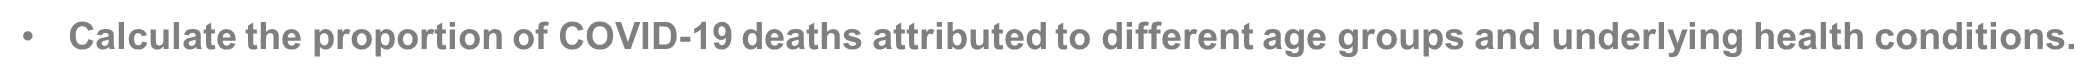

In [10]:
df.head()

,data as of,start date,end date,group,year,month,state,condition group,condition,icd10_codes,age group,covid-19 deaths,number of mentions,flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,
1,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,
2,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,
3,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,
4,09/24/2023,01/01/2020,09/23/2023,By Total,,,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,


In [11]:
# Filter relevant columns
filtered_df = df[['age group', 'condition', 'covid-19 deaths']]
age_groups = filtered_df['age group'].unique()
conditions = filtered_df['condition'].unique()
age_groups, conditions

(array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
        '85+', 'Not stated', 'All Ages', ' J20-J39', ' I45', ' I26-I43',
        ' F03"', '"Intentional and unintentional injury', ' A42-B99'],
       dtype=object),
 array(['Influenza and pneumonia', 'Chronic lower respiratory diseases',
        'Adult respiratory distress syndrome', 'Respiratory failure',
        'Respiratory arrest', 'Other diseases of the respiratory system',
        'Hypertensive diseases', 'Ischemic heart disease',
        'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure',
        'Cerebrovascular diseases',
        'Other diseases of the circulatory system', 'Sepsis',
        'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
        'Vascular and unspecified dementia', 'Renal failure', ' poisoning',
        'All other conditions and causes (residual)', 'COVID-19'],
       dtype=object))

In [12]:
# Group by Age Group and Condition to get the sum of COVID-19 deaths
grouped_data = filtered_df.groupby(['age group', 'condition']).sum().reset_index()
print(grouped_data)

      age group                                   condition  covid-19 deaths
0       A42-B99  All other conditions and causes (residual)              0.0
1          F03"           Vascular and unspecified dementia              0.0
2       I26-I43    Other diseases of the circulatory system              0.0
3           I45                          Cardiac arrhythmia              0.0
4       J20-J39    Other diseases of the respiratory system              0.0
..          ...                                         ...              ...
171  Not stated                                     Obesity              6.0
172  Not stated                               Renal failure              9.0
173  Not stated                          Respiratory arrest              0.0
174  Not stated                         Respiratory failure             18.0
175  Not stated                                      Sepsis              6.0

[176 rows x 3 columns]


In [13]:
# Calculate the total number of deaths for proportions
total_deaths = grouped_data['covid-19 deaths'].sum()
print(total_deaths)

42502727.0


In [14]:
# Calculate proportions
grouped_data['Proportion'] = grouped_data['covid-19 deaths'] / total_deaths


In [15]:
grouped_data.head()

,age group,condition,covid-19 deaths,Proportion
0,A42-B99,All other conditions and causes (residual),0.0,0.0
1,"F03""",Vascular and unspecified dementia,0.0,0.0
2,I26-I43,Other diseases of the circulatory system,0.0,0.0
3,I45,Cardiac arrhythmia,0.0,0.0
4,J20-J39,Other diseases of the respiratory system,0.0,0.0


In [16]:
import seaborn as sns

Identify the states with the highest mortality rates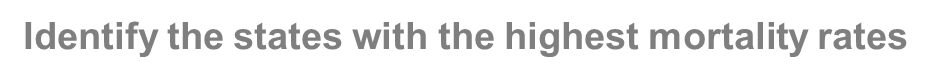

In [17]:
df['covid-19 deaths'] = df['covid-19 deaths'].fillna(0).astype(int)
df['number of mentions'] = df['number of mentions'].fillna(0).astype(int)

# Calculate mortality rate per 100,000 population
df['Mortality Rate'] = (df['covid-19 deaths'] / df['number of mentions']) * 100000

# Group by state to get cumulative mortality rate over the period
state_mortality = df.groupby('state').agg({
    'covid-19 deaths': 'sum',
    'number of mentions': 'mean'
}).reset_index()

state_mortality['Mortality Rate'] = (state_mortality['covid-19 deaths'] / state_mortality['number of mentions']) * 100000

# Sort by mortality rate in descending order to identify the highest rates
highest_mortality_states = state_mortality.sort_values(by='Mortality Rate', ascending=False).head(20)
print(highest_mortality_states)

                   state  covid-19 deaths  number of mentions  Mortality Rate
28                Nevada           251910           22.389826    1.125109e+09
40           Puerto Rico           118481           10.537217    1.124405e+09
33         New York City           628476           56.065739    1.120963e+09
18             Louisiana           321225           28.697217    1.119359e+09
8   District of Columbia            45899            4.108087    1.117284e+09
4             California          2332219          208.936522    1.116233e+09
0                Alabama           357474           32.027304    1.116154e+09
2                Arizona           558171           50.039478    1.115461e+09
24           Mississippi           305781           27.461304    1.113498e+09
31            New Mexico           146442           13.159043    1.112862e+09
10               Georgia           660262           59.374261    1.112034e+09
30            New Jersey           669951           60.422783   

Identify the states with the highest mortality rates under 25 age group.
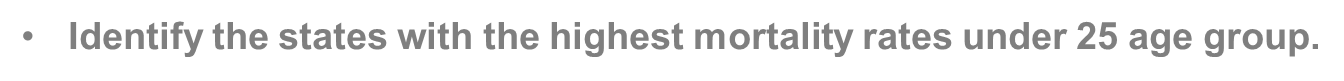

In [81]:
df['covid-19 deaths'] = df['covid-19 deaths'].fillna(0).astype(int)
df['number of mentions'] = df['number of mentions'].fillna(0).astype(int)

# Filter the data for the under 25 age group
df_under_25 = df[df['age group'] == 'Under 25']

# Group by state and calculate total covid-19 deaths for the under 25 age group
state_deaths_under_25 = df_under_25.groupby('state').agg({'covid-19 deaths': 'sum'}).reset_index()

# Calculate the mortality rate per 100,000 population
df['Mortality Rate'] = (df['covid-19 deaths'] / df['number of mentions']) * 100000

# Sort by mortality rate to identify highest mortality rates
highest_mortality_states_under_25 = df.sort_values(by='Mortality Rate', ascending=False).head(20)
print(highest_mortality_states_under_25)

        data as of start date    end date     group  year month         state  \
620390  09/24/2023 2023-09-01  09/23/2023  By Month  2023     9    New Jersey   
491893  09/24/2023 2021-11-01  11/30/2021  By Month  2021    11      Kentucky   
491895  09/24/2023 2022-01-01  01/31/2022  By Month  2022     1      Kentucky   
197152  09/24/2023 2020-08-01  08/31/2020  By Month  2020     8  Pennsylvania   
491896  09/24/2023 2022-02-01  02/28/2022  By Month  2022     2      Kentucky   
491897  09/24/2023 2022-03-01  03/31/2022  By Month  2022     3      Kentucky   
491898  09/24/2023 2022-04-01  04/30/2022  By Month  2022     4      Kentucky   
491899  09/24/2023 2022-05-01  05/31/2022  By Month  2022     5      Kentucky   
491900  09/24/2023 2022-06-01  06/30/2022  By Month  2022     6      Kentucky   
491901  09/24/2023 2022-07-01  07/31/2022  By Month  2022     7      Kentucky   
491902  09/24/2023 2022-08-01  08/31/2022  By Month  2022     8      Kentucky   
491903  09/24/2023 2022-09-0

Identify any patterns or correlations between states, age groups and contributing conditions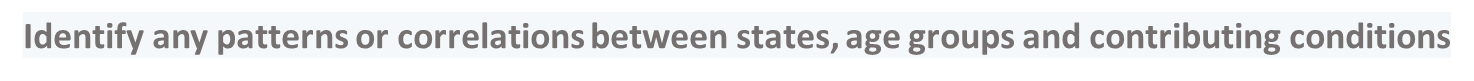

In [19]:
# Example: Analyzing patterns between states, age groups, and contributing conditions

# Group by state, age group, and contributing conditions, then aggregate COVID-19 deaths
grouped_data = df.groupby(['state', 'age group', 'condition']).agg({'covid-19 deaths': 'sum'}).reset_index()

# Display the grouped data
print(grouped_data.head())

# You can further analyze the grouped data to identify patterns or correlations
# For example, pivot the table to see the distribution of deaths by age group and contributing conditions
pivot_table = grouped_data.pivot_table(index='state', columns='age group', values='covid-19 deaths', aggfunc='sum')

# Display the pivot table
print(pivot_table)

     state age group                                   condition  \
0  Alabama   A42-B99  All other conditions and causes (residual)   
1  Alabama      F03"           Vascular and unspecified dementia   
2  Alabama   I26-I43    Other diseases of the circulatory system   
3  Alabama       I45                          Cardiac arrhythmia   
4  Alabama   J20-J39    Other diseases of the respiratory system   

   covid-19 deaths  
0                0  
1                0  
2                0  
3                0  
4                0  
age group              A42-B99   F03"   I26-I43   I45   J20-J39  \
state                                                             
Alabama                      0      0         0     0         0   
Alaska                       0      0         0     0         0   
Arizona                      0      0         0     0         0   
Arkansas                     0      0         0     0         0   
California                   0      0         0     0         0

Identify the most common condition by state and age group
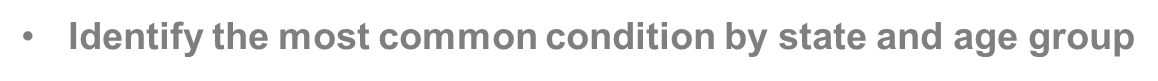


In [20]:
# Group by state, age group, and condition, then aggregate the number of deaths
grouped_data = df.groupby(['state', 'age group', 'condition']).agg({'covid-19 deaths': 'sum'}).reset_index()

# Identify the most common condition by state and age group
# We need to find the condition with the maximum deaths for each combination of state and age group
most_common_condition = grouped_data.loc[grouped_data.groupby(['state', 'age group'])['covid-19 deaths'].idxmax()]

# Display the result
print(most_common_condition)

        state   age group                                   condition  \
0     Alabama     A42-B99  All other conditions and causes (residual)   
1     Alabama        F03"           Vascular and unspecified dementia   
2     Alabama     I26-I43    Other diseases of the circulatory system   
3     Alabama         I45                          Cardiac arrhythmia   
4     Alabama     J20-J39    Other diseases of the respiratory system   
...       ...         ...                                         ...   
9421  Wyoming       65-74                                    COVID-19   
9438  Wyoming       75-84                                    COVID-19   
9455  Wyoming         85+                                    COVID-19   
9472  Wyoming    All Ages                                    COVID-19   
9487  Wyoming  Not stated         Adult respiratory distress syndrome   

      covid-19 deaths  
0                   0  
1                   0  
2                   0  
3                   0  
4  

Comparing trends accross different states and age groups
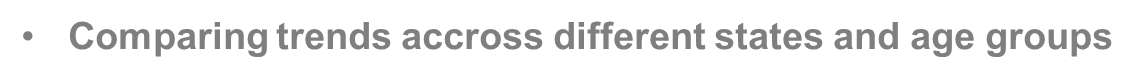

In [21]:
# Group by state and age group, then aggregate the number of COVID-19 deaths
grouped_data = df.groupby(['state', 'age group']).agg({'covid-19 deaths': 'sum'}).reset_index()

# Pivot the data to create a matrix of states vs age groups
pivot_table = grouped_data.pivot_table(index='state', columns='age group', values='covid-19 deaths', aggfunc='sum').fillna(0)

# Display the pivot table
print(pivot_table)

age group              A42-B99   F03"   I26-I43   I45   J20-J39  \
state                                                             
Alabama                      0      0         0     0         0   
Alaska                       0      0         0     0         0   
Arizona                      0      0         0     0         0   
Arkansas                     0      0         0     0         0   
California                   0      0         0     0         0   
Colorado                     0      0         0     0         0   
Connecticut                  0      0         0     0         0   
Delaware                     0      0         0     0         0   
District of Columbia         0      0         0     0         0   
Florida                      0      0         0     0         0   
Georgia                      0      0         0     0         0   
Hawaii                       0      0         0     0         0   
Idaho                        0      0         0     0         

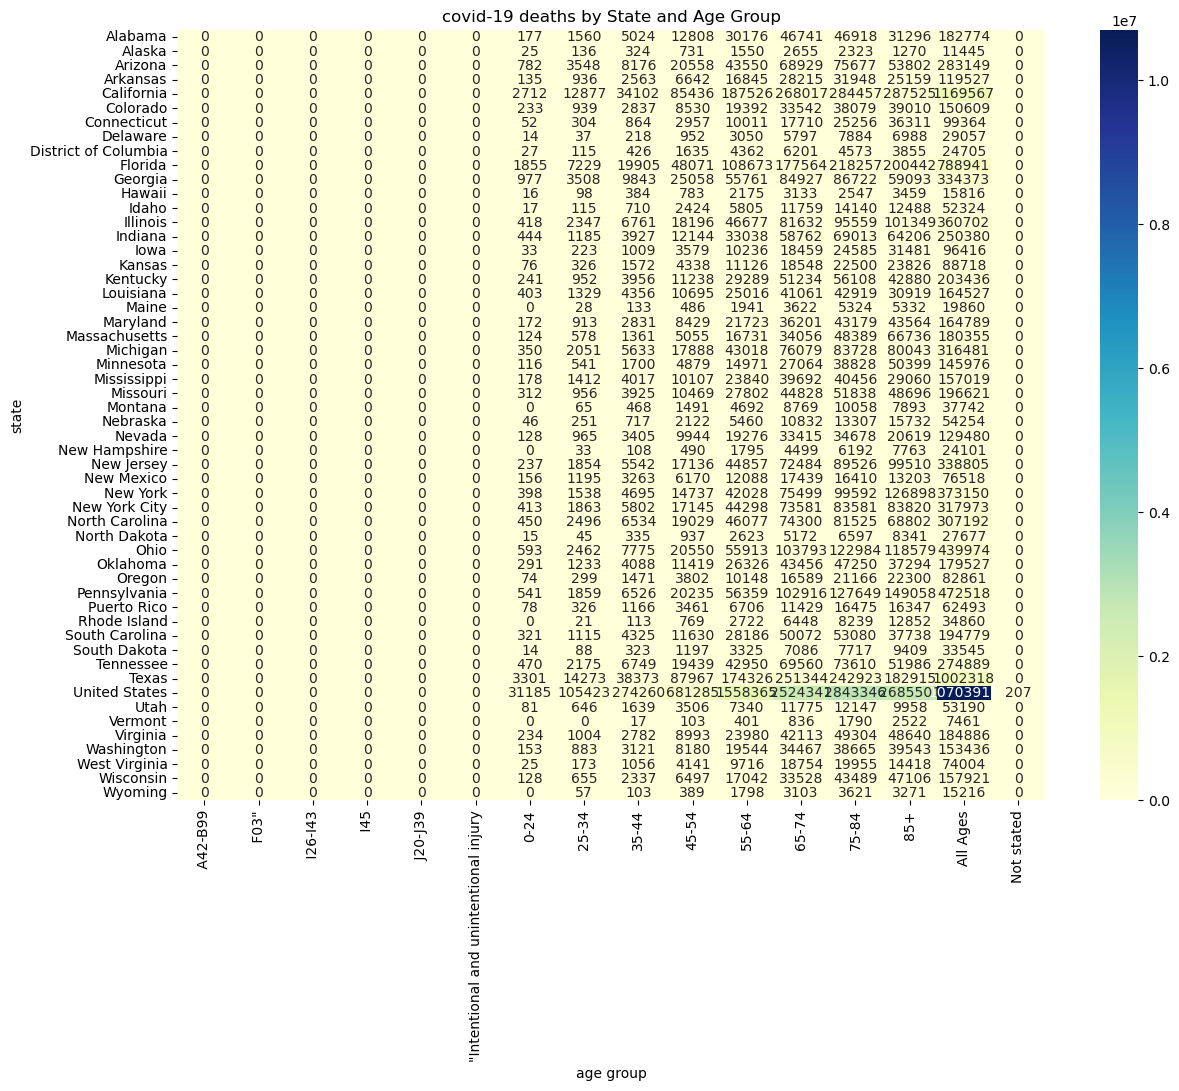

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a heatmap to visualize the trends
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")

# Set the labels and title
plt.title('covid-19 deaths by State and Age Group')
plt.xlabel('age group')
plt.ylabel('state')

# Show the plot
plt.show()

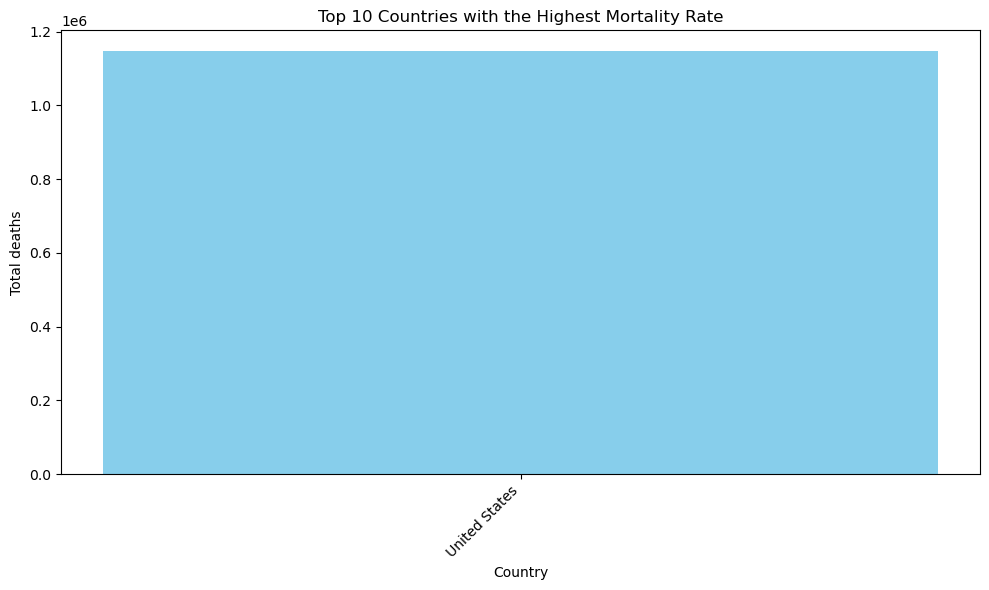

In [106]:
# Sort the DataFrame by the "covid-19 deaths" column in descending order
sorted_df = df.sort_values(by='covid-19 deaths', ascending=False)
# Select the top 10 rows
top_10_countries = sorted_df.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_state['state'], top_10_state['covid-19 deaths'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total deaths')
plt.title('Top 10 Countries with the Highest Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()